<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Marketing_chap_12_A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random
import tensorflow as tf
from tensorflow import keras

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.shape

(548, 7)

In [3]:
df.head(15)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


There are a total of seven variables in the dataset. You can find the descriptions of these
variables on the IBM Watson Analytics Community page, but we will reiterate in the
following:
- MarketID: unique identifier for market
- MarketSize: size of market area by sales
- LocationID: unique identifier for store location
- AgeOfStore: age of store in years
- Promotion: one of three promotions that was tested
- week: one of four weeks when the promotions were run
- SalesInThousands: sales amount for specific LocationID, Promotion, and week

# Data analysis


- Total Sales

In [4]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

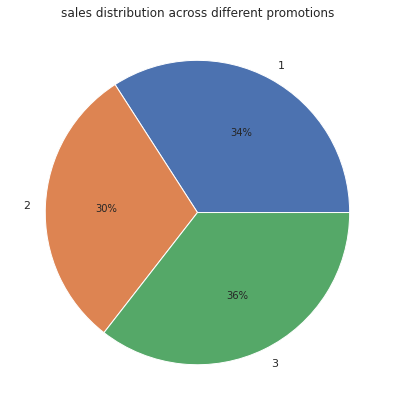

In [5]:
ax = df.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')

plt.show()

In [7]:
df.Promotion.value_counts(normalize=True)

3    0.343066
2    0.343066
1    0.313869
Name: Promotion, dtype: float64

- Market Size

In [8]:
df.groupby('MarketSize').count()['MarketID']

MarketSize
Large     168
Medium    320
Small      60
Name: MarketID, dtype: int64

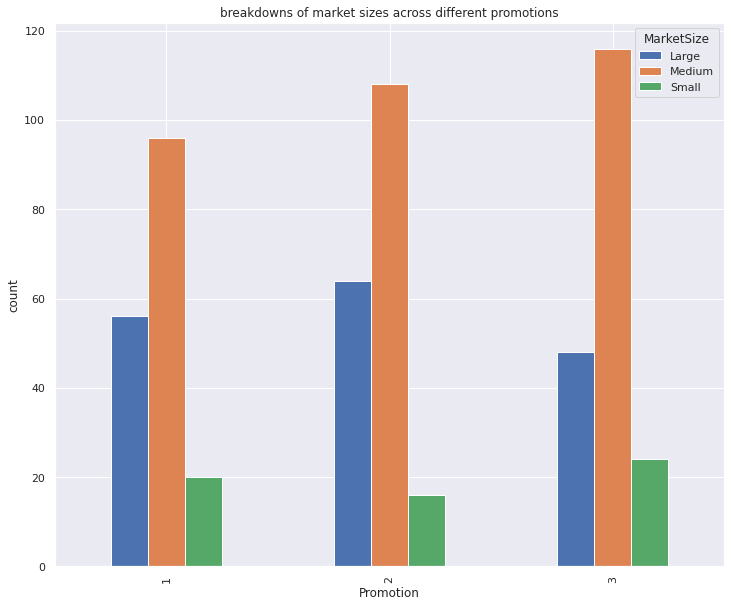

In [9]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).count()[
    'MarketID'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

In [ ]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).count()[
    'MarketID'
].unstack(
    'Promotion'
)
ax

Promotion,1,2,3
MarketSize,,,
Large,56,64,48
Medium,96,108,116
Small,20,16,24


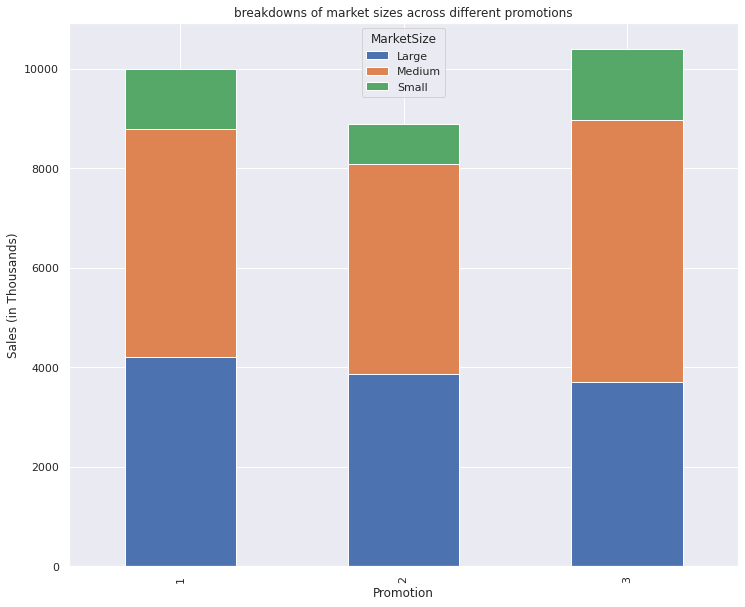

In [10]:

ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

In [23]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
)
ax

MarketSize,Large,Medium,Small
Promotion,,,
1,4213.21,4576.57,1203.25
2,3860.61,4224.35,812.97
3,3705.79,5274.39,1428.34


As you can see from this bar chart, the medium market size occupies the most among all
three promotion groups, while the small market size occupies the least. We can verify that
the compositions of different market sizes are similar among the three promotion groups
from this plot.

- Store Age

In [11]:
df['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

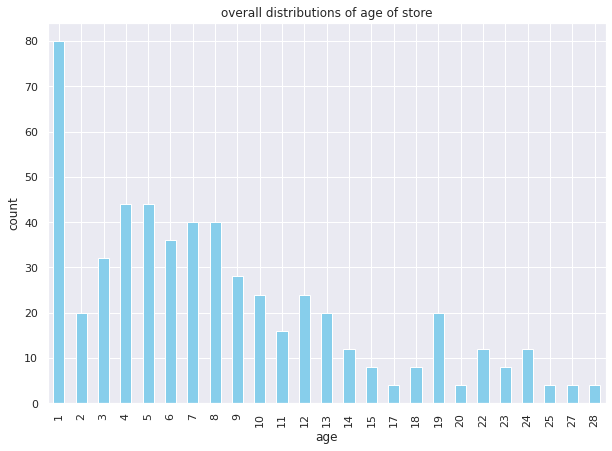

In [12]:
ax = df.groupby(
    'AgeOfStore'
).count()[
    'MarketID'
].plot(
    kind='bar', 
    color='skyblue',
    figsize=(10,7),
    grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

As you can see from this plot, a large number of stores are 1 year old and the majority of
stores are 10 years old or less. However, what we are more interested in is whether the
stores in the three different promotion groups have similar store age profiles. Take a look at
the following code:

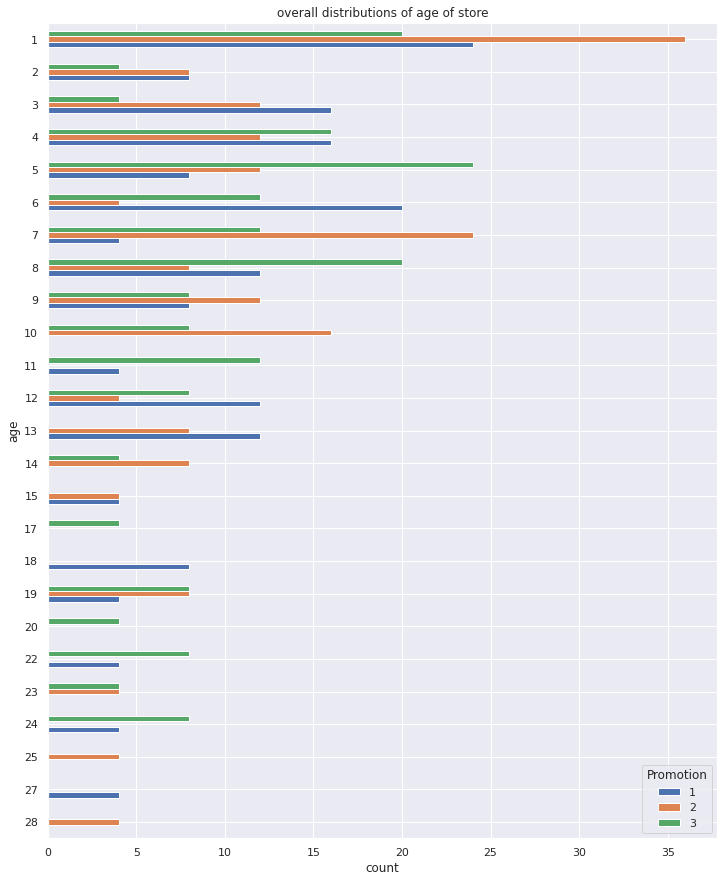

In [13]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh', 
    figsize=(12,15),
    grid=True
)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

The store age distributions across the three different promotion groups seem to align with
each other, but it is quite difficult to digest the information presented from this plot. It will
be easier to look at the summary statistics of store ages across the three promotion groups.
Take a look at the following code:

In [28]:
df.groupby('Promotion')['AgeOfStore'].count()

Promotion
1    172
2    188
3    188
Name: AgeOfStore, dtype: int64

In [14]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


As you may notice from this output, it is much easier to understand the overall store age
distributions from these summary statistics. We can see that all three test groups seem to
have similar store age profiles. The average ages of stores for the three groups are 8–9 years
old and the majority of the stores are 10–12 years old or younger.

By analyzing how each promotion or test group is comprised, we could verify that the store
profiles are similar to each other. This suggests that the sample groups are well controlled
and the A/B testing results will be meaningful and trustworthy.

- Week Number